# Setting

In [66]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

# Lettura dataset

In [67]:
df = pd.read_csv("data/globaltemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


# Esplorazione e pre processing

In [68]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,3180.000000,3180.000000
mean,8.374731,0.938468
std,4.381310,1.096440
min,-2.080000,0.034000
25%,4.312000,0.186750
50%,8.610500,0.392000
75%,12.548250,1.419250
max,19.021000,7.880000


In [69]:
df.isna().sum()

# vedi progetto tiem series per sistemazione

dt                                    0
LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64

In [70]:
df['dt'] = pd.to_datetime(df['dt'], format='%Y/%m/%d')
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
...,...,...,...
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119


In [71]:
# aggiungere altre feature coem mese ecc...
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,1,1750
1,1750-02-01,3.083,3.702,2,1750
2,1750-03-01,5.626,3.076,3,1750
3,1750-04-01,8.490,2.451,4,1750
4,1750-05-01,11.573,2.072,5,1750
...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,8,2015
3188,2015-09-01,12.999,0.079,9,2015
3189,2015-10-01,10.801,0.102,10,2015
3190,2015-11-01,7.433,0.119,11,2015


In [72]:
df.set_index('dt', inplace=True)
# df = df[['LandAverageTemperature']]
# df

In [73]:
fig = px.line(df, x=df.index, y="LandAverageTemperature", title='Livello mensile')
fig.show()

In [74]:
df_year = df[['LandAverageTemperature']].resample("Y").sum()
fig = px.line(df_year, x=df_year.index, y="LandAverageTemperature", title='Livello annuale')
fig.show()

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



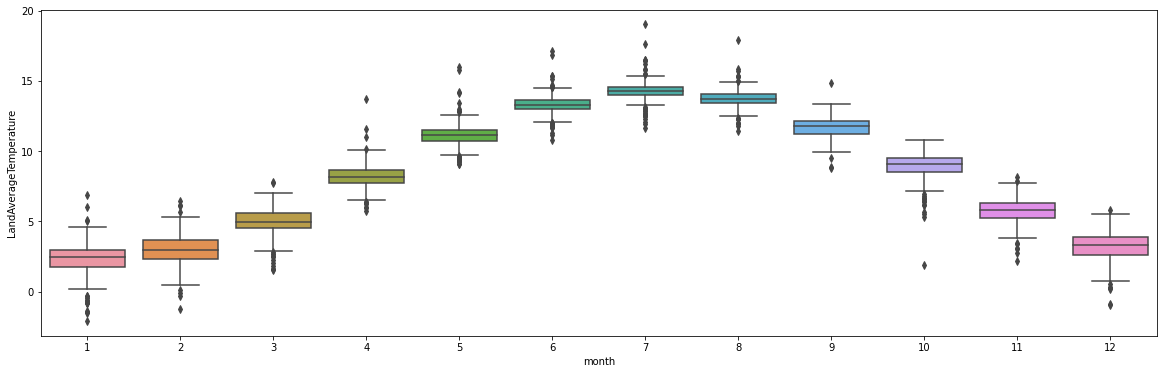

In [79]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(df['month'], df['LandAverageTemperature'])
ax.set_xlabel('month')
ax.set_ylabel('LandAverageTemperature')

plt.show()

In [2]:
# analizzare tendenza e stagionalità

# Regressione lineare del trend

In [ ]:
# Per fare regressione lineare di una timeseries è conveniente trasformare l'indice (l'asse X) in un numero che indica il numero di periodi passati dal momento inziale.

# Previsioni temepraturature prossimi 10 anni